In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
ds = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
ds.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
ds.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [7]:
ds.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
# convert ORDERDATE to numeric attribute
ds['ORDERDATE'] = pd.to_datetime(ds['ORDERDATE'])
ds['ORDERDATE'] = ds['ORDERDATE'].astype('int64')

ds['STATUS'] = ds['STATUS'].replace('Shipped',1)
ds['STATUS'] = ds['STATUS'].replace('Resolved', 2)
ds['STATUS'] = ds['STATUS'].replace('Cancelled', 3)
ds['STATUS'] = ds['STATUS'].replace('On Hold', 4)
ds['STATUS'] = ds['STATUS'].replace('Disputed', 5)
ds['STATUS'] = ds['STATUS'].replace('In Process', 6)


ds = ds.drop(columns=['PRODUCTCODE'])

ds = ds.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

ds = ds.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME','CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])

ds = pd.get_dummies(ds, columns=['PRODUCTLINE'])


C:\Users\User\AppData\Local\Temp\ipykernel_5268\4072085009.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['STATUS'] = ds['STATUS'].replace('In Process', 6)


In [13]:
ds.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,1.084235e+18,1.198371,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.992714e+16,0.803278,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.041811e+18,1.000000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,1.068120e+18,1.000000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,1.087258e+18,1.000000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,1.100693e+18,1.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,1.117498e+18,6.000000,4.000000,12.000000,2005.00000,214.000000


[[1.03574826e+04 3.58614515e+01 8.34938077e+01 6.31291235e+00
  3.63271788e+03 1.10491211e+18 1.40716305e+00 2.80207352e+00
  7.32610745e+00 2.00445052e+03 1.00164939e+02 3.25164939e-01
  1.21583412e-01 1.20640905e-01 7.91705938e-02 2.73327050e-02
  1.08388313e-01 2.17719133e-01]
 [1.01615481e+04 3.46685341e+01 8.38322316e+01 6.79178338e+00
  3.51282371e+03 1.06232051e+18 1.03734827e+00 2.96265173e+00
  7.76283847e+00 2.00306629e+03 1.01510738e+02 3.66946779e-01
  1.13912232e-01 9.05695612e-02 8.40336134e-02 2.80112045e-02
  1.02707750e-01 2.13818861e-01]
 [1.02577048e+04 3.45701881e+01 8.36422865e+01 6.19681621e+00
  3.49649926e+03 1.08645049e+18 1.12735166e+00 2.20839363e+00
  5.69464544e+00 2.00400000e+03 1.00328509e+02 3.31403763e-01
  1.15774240e-01 1.17221418e-01 8.68306802e-02 2.60492041e-02
  1.09985528e-01 2.12735166e-01]]


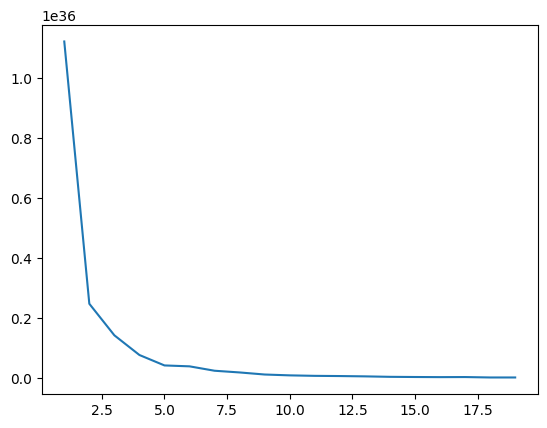

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = ds.values

WCSS = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,20), WCSS)

kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
labels = kmeans.predict(dataset)
centroids = kmeans.cluster_centers_
print(centroids)